In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter as c
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
import seaborn as sns

In [2]:
data = pd.read_csv('./Dataset/credit_train.csv')
data

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [4]:
data.isnull().sum()

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

In [5]:
data.shape

(100514, 19)

In [6]:
nan1 = data[data['Loan Status'].isnull()].index.tolist()
len(nan1)

514

In [7]:
data.drop(labels= nan1 , axis= 0 , inplace= True)

In [8]:
data['Loan Status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [9]:
le = preprocessing.LabelEncoder()

In [10]:
data['Loan Status'] = le.fit_transform(data['Loan Status']) 

In [11]:
data['Loan Status'].unique()

array([1, 0])

Loan Status done

In [12]:
data['Term'].replace(('Short Term' , 'Long Term') , (0 , 1) , inplace= True)

In [13]:
data['Term'].unique()

array([0, 1], dtype=int64)

Term Done

In [14]:
data['Credit Score'].mean()

1076.4560893550702

In [15]:
data['Credit Score'] = data['Credit Score'].fillna(data['Credit Score'].mean())

In [16]:
data['Bankruptcies'] = data['Bankruptcies'].fillna(0)

In [17]:
data['Years in current job'] = data['Years in current job'].str.extract(r"(\d+)")
data['Years in current job'] = data['Years in current job'].astype(float)

In [18]:
data['Years in current job'].fillna(data['Years in current job'].mean() , inplace= True)

In [19]:
data['Annual Income'].fillna(data['Annual Income'].mean() , inplace= True)

In [20]:
 data

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,1,445412.0,0,709.000000,1.167493e+06,8.000000,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,1,262328.0,0,1076.456089,1.378277e+06,10.000000,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,1,99999999.0,0,741.000000,2.231892e+06,8.000000,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,1,347666.0,1,721.000000,8.069490e+05,3.000000,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,1,176220.0,0,1076.456089,1.378277e+06,5.000000,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3f94c18c-ba8f-45d0-8610-88a684a410a9,2da51983-cfef-4b8f-a733-5dfaf69e9281,1,147070.0,0,725.000000,4.754370e+05,7.000000,Own Home,other,2202.86,22.3,NaN,5.0,0.0,47766.0,658548.0,0.0,0.0
99996,06eba04f-58fc-424a-b666-ed72aa008900,77f2252a-b7d1-4b07-a746-1202a8304290,1,99999999.0,0,732.000000,1.289416e+06,1.000000,Rent,Debt Consolidation,13109.05,9.4,21.0,22.0,0.0,153045.0,509234.0,0.0,0.0
99997,e1cb4050-eff5-4bdb-a1b0-aabd3f7eaac7,2ced5f10-bd60-4a11-9134-cadce4e7b0a3,1,103136.0,0,742.000000,1.150545e+06,6.000000,Rent,Debt Consolidation,7315.57,18.8,18.0,12.0,1.0,109554.0,537548.0,1.0,0.0
99998,81ab928b-d1a5-4523-9a3c-271ebb01b4fb,3e45ffda-99fd-4cfc-b8b8-446f4a505f36,1,530332.0,0,746.000000,1.717524e+06,9.000000,Rent,Debt Consolidation,9890.07,15.0,NaN,8.0,0.0,404225.0,738254.0,0.0,0.0


In [21]:
data.isnull().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                        0
Annual Income                       0
Years in current job                0
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    53141
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 2
Bankruptcies                        0
Tax Liens                          10
dtype: int64

In [22]:
data['Maximum Open Credit'].fillna(data['Maximum Open Credit'].mean() , inplace= True)

In [23]:
data['Tax Liens'].fillna(data['Tax Liens'].mean() , inplace= True)

C:\Users\SWAROOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Current Loan Amount'>

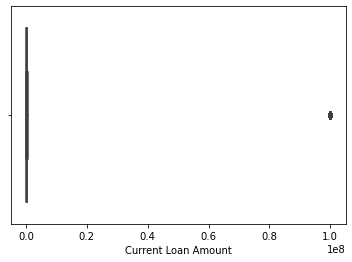

In [24]:
sns.boxplot(data['Current Loan Amount'] )

In [25]:
q1 = data['Current Loan Amount'].quantile(.25)
q2 = data['Current Loan Amount'].quantile(.5)
q3 = data['Current Loan Amount'].quantile(.75)
IQR = q3 -q2

print(q1,q2,q3,IQR)


179652.0 312246.0 524942.0 212696.0


In [26]:
data['Current Loan Amount'].min()

10802.0

In [27]:
lowerlimit = q1 - 1.5*IQR
upperlimit = q3 + 1.5*IQR

In [40]:
out_CLA = data[( data['Current Loan Amount'] > upperlimit) | (data['Current Loan Amount'] < lowerlimit) ]
out_CLA

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,1,99999999.0,0,741.0,2231892.0,8.000000,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
10,32c2e48f-1ba8-45e0-a530-9a6622c18d9c,0de7bcdb-ebf4-4608-ba39-05f083f855b6,1,99999999.0,0,728.0,714628.0,3.000000,Rent,Debt Consolidation,11851.06,16.0,76.0,16.0,0.0,203965.0,289784.0,0.0,0.0
12,403d7235-0284-4bb6-919a-09402fecbf7b,11581f68-de3c-49d8-80d9-22268ebb323b,1,99999999.0,0,740.0,776188.0,1.000000,Own Home,Debt Consolidation,11578.22,8.5,25.0,6.0,0.0,134083.0,220220.0,0.0,0.0
13,01d878ae-efa2-41e2-8159-6c834ff09f47,900c9191-2c20-4688-af7e-07c59b5d5a24,1,99999999.0,0,743.0,1560907.0,4.000000,Rent,Debt Consolidation,17560.37,13.3,NaN,10.0,1.0,225549.0,496474.0,1.0,0.0
26,0c14cb77-29a3-4964-9198-0c43f5f982b0,9baf6d5d-f744-4332-abb0-e939b75cde40,1,99999999.0,0,724.0,1029857.0,1.000000,Rent,Debt Consolidation,13817.18,12.0,NaN,6.0,0.0,138339.0,221232.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99970,1972ab02-51f9-4bc0-bb24-095740d2d18c,5b939de4-e3fa-4163-9fdc-64c0cc1aa77b,1,99999999.0,0,674.0,1058376.0,1.000000,Home Mortgage,Other,11554.09,10.1,20.0,12.0,0.0,14098.0,333300.0,0.0,0.0
99971,fa1a1ef5-3697-469c-a842-538b8dcfb63a,567c8737-56d2-4aa8-b6a2-c55182f28518,1,99999999.0,1,616.0,1530564.0,8.000000,Rent,Medical Bills,13264.85,28.0,3.0,10.0,0.0,111283.0,162910.0,0.0,0.0
99990,686017b3-dc24-4f8a-af92-0bd077452d3d,1a583add-21ba-410f-9c42-757c4ed19322,1,99999999.0,0,742.0,1190046.0,1.000000,Rent,other,11969.81,20.1,16.0,9.0,0.0,37392.0,134442.0,0.0,0.0
99996,06eba04f-58fc-424a-b666-ed72aa008900,77f2252a-b7d1-4b07-a746-1202a8304290,1,99999999.0,0,732.0,1289416.0,1.000000,Rent,Debt Consolidation,13109.05,9.4,21.0,22.0,0.0,153045.0,509234.0,0.0,0.0


In [29]:
x = data.drop(['Loan Status'] , axis=1)
y = data['Loan Status']
x.head(5)

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,445412.0,0,709.000000,1.167493e+06,8.0,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,262328.0,0,1076.456089,1.378277e+06,10.0,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,99999999.0,0,741.000000,2.231892e+06,8.0,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,347666.0,1,721.000000,8.069490e+05,3.0,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,176220.0,0,1076.456089,1.378277e+06,5.0,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [44]:
Ohe = OneHotEncoder()
ct = ColumnTransformer([("on" , Ohe , [7])] , remainder= 'passthrough')


In [46]:
x = ct.fit_transform(x)
x

array([[1.0, 0.0, 0.0, ..., 416746.0, 1.0, 0.0],
       [1.0, 0.0, 0.0, ..., 850784.0, 0.0, 0.0],
       [1.0, 0.0, 0.0, ..., 750090.0, 0.0, 0.0],
       ...,
       [1.0, 0.0, 0.0, ..., 537548.0, 1.0, 0.0],
       [1.0, 0.0, 0.0, ..., 738254.0, 0.0, 0.0],
       [1.0, 0.0, 0.0, ..., 91014.0, 1.0, 0.0]], dtype=object)

In [47]:
x = x[:,1:]

In [48]:
x

array([[0.0, 0.0, 1.0, ..., 416746.0, 1.0, 0.0],
       [0.0, 0.0, 1.0, ..., 850784.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, ..., 750090.0, 0.0, 0.0],
       ...,
       [0.0, 0.0, 0.0, ..., 537548.0, 1.0, 0.0],
       [0.0, 0.0, 0.0, ..., 738254.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, ..., 91014.0, 1.0, 0.0]], dtype=object)

<AxesSubplot:xlabel='Annual Income'>

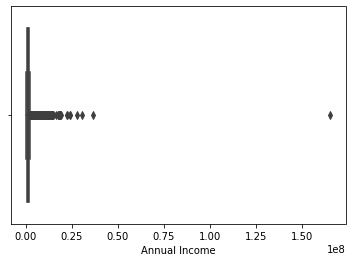

In [37]:
sns.boxplot(x=data["Annual Income"])

In [31]:
data

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,1,445412.0,0,709.000000,1.167493e+06,8.000000,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,1,262328.0,0,1076.456089,1.378277e+06,10.000000,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,1,99999999.0,0,741.000000,2.231892e+06,8.000000,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,1,347666.0,1,721.000000,8.069490e+05,3.000000,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,1,176220.0,0,1076.456089,1.378277e+06,5.000000,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3f94c18c-ba8f-45d0-8610-88a684a410a9,2da51983-cfef-4b8f-a733-5dfaf69e9281,1,147070.0,0,725.000000,4.754370e+05,7.000000,Own Home,other,2202.86,22.3,NaN,5.0,0.0,47766.0,658548.0,0.0,0.0
99996,06eba04f-58fc-424a-b666-ed72aa008900,77f2252a-b7d1-4b07-a746-1202a8304290,1,99999999.0,0,732.000000,1.289416e+06,1.000000,Rent,Debt Consolidation,13109.05,9.4,21.0,22.0,0.0,153045.0,509234.0,0.0,0.0
99997,e1cb4050-eff5-4bdb-a1b0-aabd3f7eaac7,2ced5f10-bd60-4a11-9134-cadce4e7b0a3,1,103136.0,0,742.000000,1.150545e+06,6.000000,Rent,Debt Consolidation,7315.57,18.8,18.0,12.0,1.0,109554.0,537548.0,1.0,0.0
99998,81ab928b-d1a5-4523-9a3c-271ebb01b4fb,3e45ffda-99fd-4cfc-b8b8-446f4a505f36,1,530332.0,0,746.000000,1.717524e+06,9.000000,Rent,Debt Consolidation,9890.07,15.0,NaN,8.0,0.0,404225.0,738254.0,0.0,0.0


In [33]:
data['Months since last delinquent']

0         NaN
1         8.0
2        29.0
3         NaN
4         NaN
         ... 
99995     NaN
99996    21.0
99997    18.0
99998     NaN
99999     NaN
Name: Months since last delinquent, Length: 100000, dtype: float64

In [39]:
data['Annual Income'] > 1000000

0         True
1         True
2         True
3        False
4         True
         ...  
99995    False
99996     True
99997     True
99998     True
99999    False
Name: Annual Income, Length: 100000, dtype: bool

In [41]:
data

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,1,445412.0,0,709.000000,1.167493e+06,8.000000,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,1,262328.0,0,1076.456089,1.378277e+06,10.000000,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,1,99999999.0,0,741.000000,2.231892e+06,8.000000,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,1,347666.0,1,721.000000,8.069490e+05,3.000000,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,1,176220.0,0,1076.456089,1.378277e+06,5.000000,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3f94c18c-ba8f-45d0-8610-88a684a410a9,2da51983-cfef-4b8f-a733-5dfaf69e9281,1,147070.0,0,725.000000,4.754370e+05,7.000000,Own Home,other,2202.86,22.3,NaN,5.0,0.0,47766.0,658548.0,0.0,0.0
99996,06eba04f-58fc-424a-b666-ed72aa008900,77f2252a-b7d1-4b07-a746-1202a8304290,1,99999999.0,0,732.000000,1.289416e+06,1.000000,Rent,Debt Consolidation,13109.05,9.4,21.0,22.0,0.0,153045.0,509234.0,0.0,0.0
99997,e1cb4050-eff5-4bdb-a1b0-aabd3f7eaac7,2ced5f10-bd60-4a11-9134-cadce4e7b0a3,1,103136.0,0,742.000000,1.150545e+06,6.000000,Rent,Debt Consolidation,7315.57,18.8,18.0,12.0,1.0,109554.0,537548.0,1.0,0.0
99998,81ab928b-d1a5-4523-9a3c-271ebb01b4fb,3e45ffda-99fd-4cfc-b8b8-446f4a505f36,1,530332.0,0,746.000000,1.717524e+06,9.000000,Rent,Debt Consolidation,9890.07,15.0,NaN,8.0,0.0,404225.0,738254.0,0.0,0.0
